In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
_data = np.ones((100, 2))
_x0 = np.random.normal(2*_data, 1)       # shape=(100, 2)
_x1 = np.random.normal(-2*_data, 1)      # shape=(100, 2)
_y0 = np.zeros(100)                      # shape=(100, 1)
_y1 = np.ones(100)                       # shape=(100, 1)
_x = np.vstack((_x0, _x1))  # shape (200, 2) + some noise
_y = np.hstack((_y0, _y1))  # shape (200, )

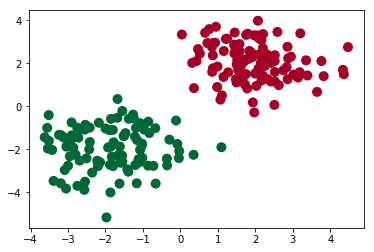

In [5]:
plt.scatter(_x[:, 0], _x[:, 1], c=_y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [29]:
_tf_x = tf.placeholder(tf.float32, _x.shape)     
_tf_y = tf.placeholder(tf.int32, _y.shape)    

In [30]:
#构建神经网络
_layer_1 = tf.layers.dense(_tf_x, 10, tf.nn.relu)          # hidden layer
_output = tf.layers.dense(_layer_1, 2)                     # output layer

In [31]:
#定义损失函数
_loss = tf.losses.sparse_softmax_cross_entropy(labels=_tf_y, logits=_output)           # compute cost
#定义计算准确度函数
#tf.metrics.accuracy计算精度,返回accuracy和update_operation
_accuracy = tf.metrics.accuracy(          #
    labels=tf.squeeze(_tf_y), predictions=tf.argmax(_output, axis=1),)[1]
#梯度下降
_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
_train = _optimizer.minimize(_loss)

In [32]:
sess = tf.Session()                                                                 # control training and others
_init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(_init_op)     # initialize var in graph

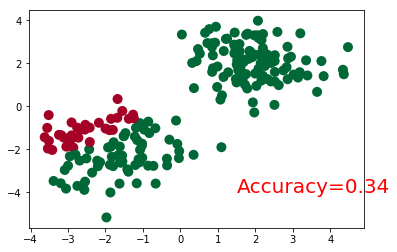

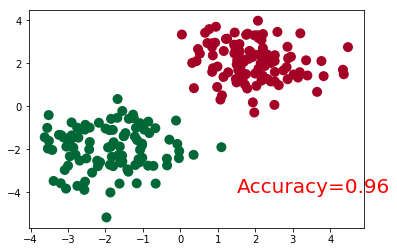

In [33]:
plt.ion()   # something about plotting
for step in range(100):
    # train and net output
    _, _acc, _pred = sess.run([_train, _accuracy, _output], {_tf_x: _x, _tf_y: _y})
    if step % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(_x[:, 0], _x[:, 1], c=_pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % _acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

#plt.ioff()
#plt.show()